<a href="https://colab.research.google.com/github/EmperorNao/MLHub/blob/main/DLS/sem1/HW3/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [198]:
!wget -O train.csv https://vk.com/doc209646771_632063537?hash=72705ee81cb683817b&dl=474cf35459f17f62ca
!wget -O test.csv https://vk.com/doc209646771_632063527?hash=59a58055c24a70d69f&dl=cbee47200e26df8667
!wget -O submission.csv https://vk.com/doc209646771_632063530?hash=c117ba1d00a374c43b&dl=e4ed277865d5bed7f0

--2022-03-06 16:40:33--  https://vk.com/doc209646771_632063537?hash=72705ee81cb683817b
Resolving vk.com (vk.com)... 87.240.137.158, 87.240.190.67, 87.240.190.72, ...
Connecting to vk.com (vk.com)|87.240.137.158|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://psv4.userapi.com/c237231/u209646771/docs/d38/5bc465e4bfab/train.csv?extra=YhI2HyOx0YAmhWA2fWSbkvjimsOLDhAH6TSLydZuPLUC7_b_MX7Gs9gjU9Ec7nV9rR4K_wPiuHi-GOc6NtjKVf5ilKopuj1vzy_URevGiwnroig7f01jFuu8uuKok59kEKte_Ul1FMVv&dl=1 [following]
--2022-03-06 16:40:34--  https://psv4.userapi.com/c237231/u209646771/docs/d38/5bc465e4bfab/train.csv?extra=YhI2HyOx0YAmhWA2fWSbkvjimsOLDhAH6TSLydZuPLUC7_b_MX7Gs9gjU9Ec7nV9rR4K_wPiuHi-GOc6NtjKVf5ilKopuj1vzy_URevGiwnroig7f01jFuu8uuKok59kEKte_Ul1FMVv&dl=1
Resolving psv4.userapi.com (psv4.userapi.com)... 87.240.190.89, 87.240.137.134, 87.240.137.140, ...
Connecting to psv4.userapi.com (psv4.userapi.com)|87.240.190.89|:443... connected.
HTTP request sent, awaiting respon

In [199]:
import numpy as np
SEED = 42

np.random.seed(42)

In [200]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

In [201]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [202]:
data = pd.read_csv('./train.csv')

In [203]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [204]:
data.sample(5)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1448,9,45.40,418.8,Male,0,No,No,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
4792,37,70.35,2552.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,0
8,50,105.95,5341.8,Male,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,Month-to-month,No,Credit card (automatic),1
3964,44,100.10,4378.35,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),0
240,25,20.95,495.15,Male,0,Yes,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Bank transfer (automatic),0


In [205]:
print(f"Количество объектов: {len(data)}\n")
data.info()

Количество объектов: 5282

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-n

In [206]:
print("NaN")
print((data.isna()).sum())

print()

print("Пустые строки и пробелы")
print(((data == ' ') | (data == '')).sum())

NaN
ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

Пустые строки и пробелы
ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             

In [207]:
data = data[data != ' ']
data = data.dropna()

data['TotalSpent'] = data['TotalSpent'].astype('float64')

In [208]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5273 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5273 non-null   int64  
 1   MonthlySpending           5273 non-null   float64
 2   TotalSpent                5273 non-null   float64
 3   Sex                       5273 non-null   object 
 4   IsSeniorCitizen           5273 non-null   int64  
 5   HasPartner                5273 non-null   object 
 6   HasChild                  5273 non-null   object 
 7   HasPhoneService           5273 non-null   object 
 8   HasMultiplePhoneNumbers   5273 non-null   object 
 9   HasInternetService        5273 non-null   object 
 10  HasOnlineSecurityService  5273 non-null   object 
 11  HasOnlineBackup           5273 non-null   object 
 12  HasDeviceProtection       5273 non-null   object 
 13  HasTechSupportAccess      5273 non-null   object 
 14  HasOnlin

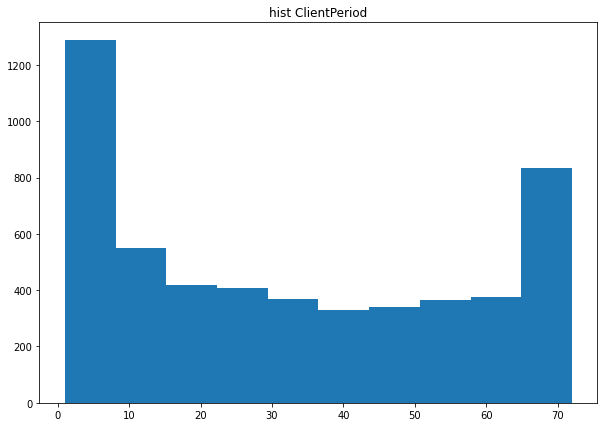

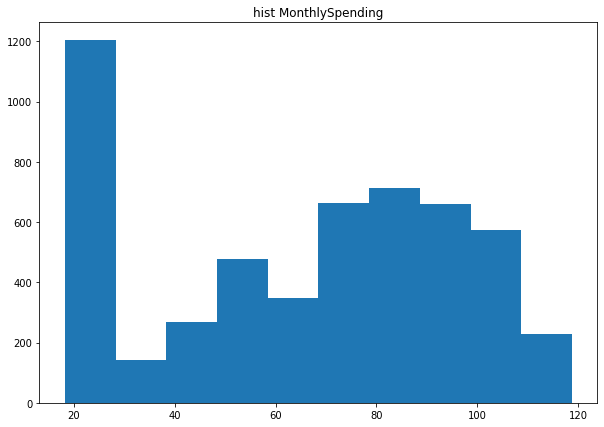

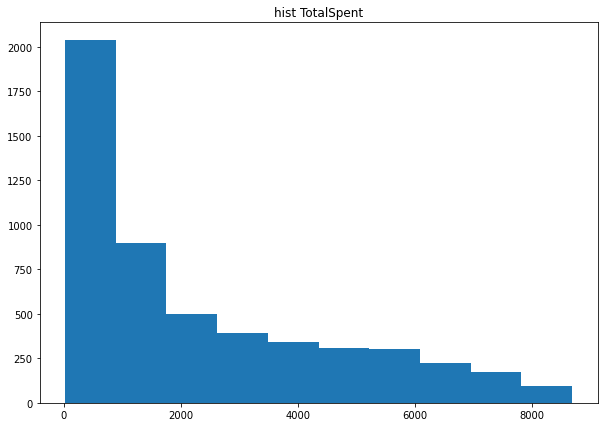

In [209]:
for col in num_cols:

    plt.figure(figsize=(10, 7))
    plt.title("hist " + col)
    plt.hist(data[col])
    plt.show()

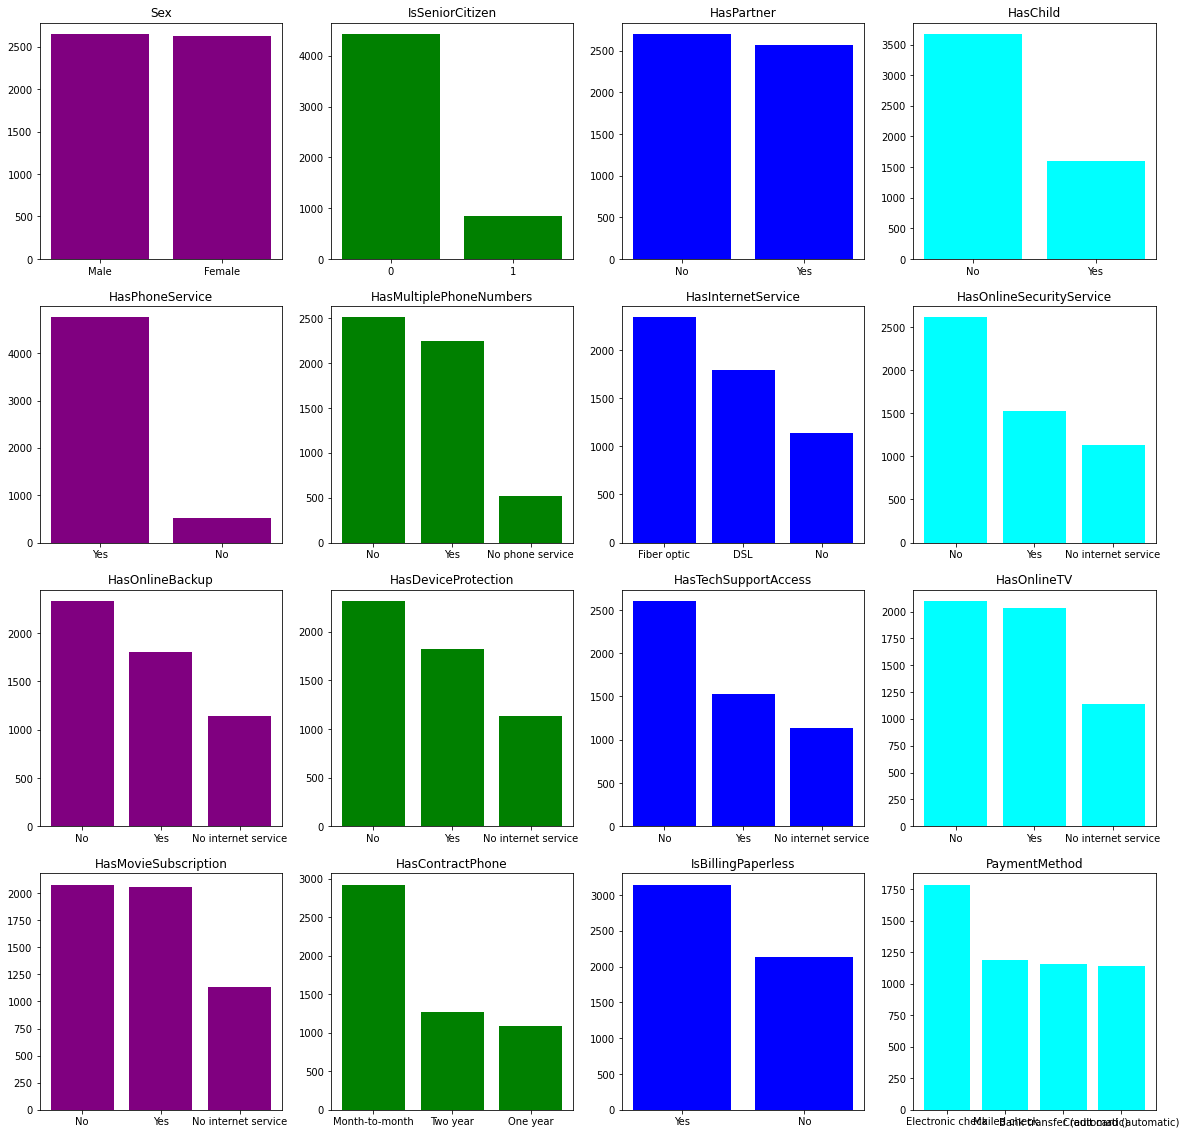

In [210]:
from math import ceil

n_cat_cols = len(cat_cols)

ncols = 4
nrows = ceil(n_cat_cols / 4)


colors = ['purple', 'green', 'blue', 'cyan']

plt.figure(figsize = (5 * nrows, 5 * ncols))
for index, col in enumerate(cat_cols):

    plt.subplot(nrows, ncols, index + 1)
    plt.title(col)

    d = data[col].value_counts()
    plt.bar(list(d.index), list(d.values), tick_label=list(d.index), color=colors[index % len(colors)])

plt.show()

<BarContainer object of 2 artists>

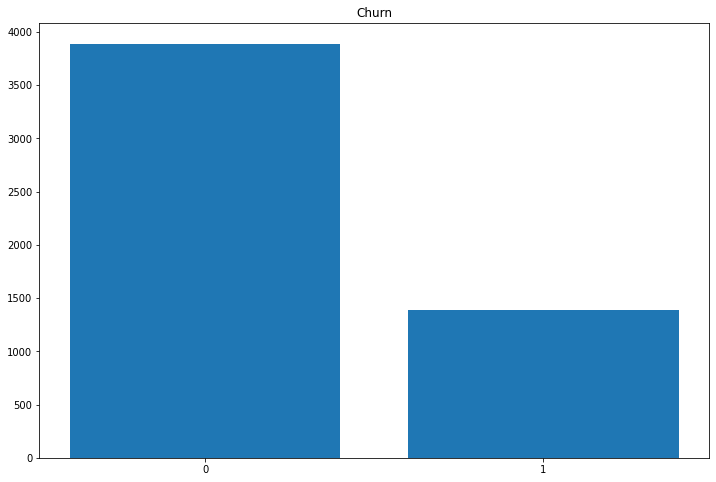

In [211]:
plt.figure(figsize = (12, 8))

plt.title(target_col)
d = data[target_col].value_counts()
plt.bar(list(d.index), list(d.values), tick_label=list(d.index))

In [212]:
X = data[feature_cols]
y = data[target_col]

In [213]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [214]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [215]:
numeric_transformer = Pipeline(
    steps=[("scaler", StandardScaler())]
)

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, num_cols),
        ("cat", categorical_transformer, cat_cols),
    ]
)


In [216]:
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(random_state=SEED))]
)

In [217]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)

pipeline.fit(X_train, y_train)
print("Скор простой линейки: %.4f" % roc_auc_score(y_test, pipeline.predict(X_test)))

Скор простой линейки: 0.7145


In [218]:
from sklearn.svm import SVC

In [219]:
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", SVC(random_state=SEED, kernel='rbf', ))]
)
pipeline.fit(X_train, y_train)
print("Скор простой линейки: %.4f" % roc_auc_score(y_test, pipeline.predict(X_test)))

Скор простой линейки: 0.7018


##Теперь попробуем CV

In [220]:
parameters = {
    'classifier__penalty': ['elasticnet'],
    'classifier__C': [1e2],
    'classifier__class_weight': [None],
    'classifier__l1_ratio': [0.1],
}

In [221]:
pipeline = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression(random_state=SEED, solver='saga'))]
)

In [222]:
search = GridSearchCV(pipeline, parameters, scoring = 'roc_auc', verbose=1, n_jobs =-1)
search.fit(X, y)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['ClientPeriod',
                                                                          'MonthlySpending',
                                                                          'TotalSpent']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Sex',
                                                                          'IsSeniorCitizen',
             

In [223]:
clf = search.best_estimator_
print(f"Лучший скор: {search.best_score_}")
print(f"Лучшие параметры: {search.best_params_}")

Лучший скор: 0.844827370696579
Лучшие параметры: {'classifier__C': 100.0, 'classifier__class_weight': None, 'classifier__l1_ratio': 0.1, 'classifier__penalty': 'elasticnet'}


roc = *0.8448*

In [224]:
print(f"Лучший скор: {roc_auc_score(y_test, clf.predict(X_test))}")

Лучший скор: 0.7213257843831092


CB

In [226]:
!pip install catboost

In [275]:
from catboost.metrics import AUC

In [276]:
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED)
X_train['linear_prob'] = np.expand_dims(clf.predict_proba(X_train)[:, 1], -1)
X_test['linear_prob'] = np.expand_dims(clf.predict_proba(X_test)[:, 1], -1)

In [313]:
superCB = CatBoostClassifier(eval_metric=AUC(), random_seed=SEED, cat_features=cat_cols)

In [318]:
parameters = {
    'depth': [6],
    'learning_rate': [0.01],
    'auto_class_weights': ['Balanced']
}

In [319]:
from google.colab import output
output.enable_custom_widget_manager()

In [320]:
grid_search_result = superCB.grid_search(parameters, cv=5, X=X, y=y, plot=True, partition_random_seed=SEED)

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
24:	test: 0.8270698	best: 0.8280257 (3)	total: 634ms	remaining: 24.7s
25:	test: 0.8272716	best: 0.8280257 (3)	total: 662ms	remaining: 24.8s
26:	test: 0.8276568	best: 0.8280257 (3)	total: 687ms	remaining: 24.7s
27:	test: 0.8276173	best: 0.8280257 (3)	total: 703ms	remaining: 24.4s
28:	test: 0.8275384	best: 0.8280257 (3)	total: 723ms	remaining: 24.2s
29:	test: 0.8278865	best: 0.8280257 (3)	total: 743ms	remaining: 24s
30:	test: 0.8277844	best: 0.8280257 (3)	total: 764ms	remaining: 23.9s
31:	test: 0.8277310	best: 0.8280257 (3)	total: 786ms	remaining: 23.8s
32:	test: 0.8274340	best: 0.8280257 (3)	total: 804ms	remaining: 23.6s
33:	test: 0.8275779	best: 0.8280257 (3)	total: 811ms	remaining: 23s
34:	test: 0.8271649	best: 0.8280257 (3)	total: 835ms	remaining: 23s
35:	test: 0.8270350	best: 0.8280257 (3)	total: 859ms	remaining: 23s
36:	test: 0.8269863	best: 0.8280257 (3)	total: 871ms	remaining: 22.7s
37:	test: 0.8265640	best: 0.82

In [321]:
print(f"Лучший скор: {roc_auc_score(y_test, superCB.predict(X_test))}")

Лучший скор: 0.7913658881811748


In [322]:
best_model = superCB

In [323]:
X_test = pd.read_csv('./test.csv')
X_test = X_test.replace(' ', 0)
X_test['linear_prob'] = np.expand_dims(clf.predict_proba(X_test)[:, 1], -1)
submission = pd.read_csv('./submission.csv')

In [324]:
submission['Churn'] = best_model.predict_proba(X_test)[:, 1] * 0.8 + clf.predict_proba(X_test)[:, 1] * 0.2
submission.to_csv('./my_submission.csv', index=False)

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.